<a href="https://colab.research.google.com/github/TTD-JPO/TDD-project/blob/fabero/Main_TweetDisasterDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libs & Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, time

[Link to data (csv) @google drive](https://drive.google.com/file/d/1QPragNh_wYQVsXQvds8sqjDMfzARD638/view?usp=sharing)


In [31]:
url = 'https://raw.githubusercontent.com/TTD-JPO/TDD-project/main/disaster_tweets.csv'
disaster_tweets = pd.read_csv(url, encoding='latin-1')

## Evaluate data

In [32]:
disaster_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [33]:
print( "absolute number of disaster indicated messages:", disaster_tweets.target.sum() )
print( f"relative number of disaster indicated messages: {disaster_tweets.target.sum() / disaster_tweets.shape[0] :0.3f}" )

absolute number of disaster indicated messages: 3271
relative number of disaster indicated messages: 0.430


In [34]:
keys      = list(disaster_tweets.keyword.unique() )
locations = list(disaster_tweets.location.unique() )

In [35]:
disaster_tweets.groupby('keyword').target.count().sort_values(ascending=False)

keyword
fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: target, Length: 221, dtype: int64

In [36]:
disaster_tweets.groupby('location').target.count().sort_values(ascending=False)

location
USA                            104
New York                        71
United States                   50
London                          45
Canada                          29
                              ... 
Republica Dominicana             1
Republic of the Philippines      1
Regalo Island                    1
Redondo Beach, CA                1
                                 1
Name: target, Length: 3341, dtype: int64

In [37]:
display( f"relative number of keyword   messages: {disaster_tweets.keyword.nunique()  / disaster_tweets.shape[0] :0.3f}" )
display( f"relative number of location  messages: {disaster_tweets.location.nunique() / disaster_tweets.shape[0] :0.3f}" )

'relative number of keyword   messages: 0.029'

'relative number of location  messages: 0.439'

In [38]:
### we might do these steps later after having processed the text :)
#dt = disaster_tweets.copy()

## Visualization of data (of)

In [39]:
df = disaster_tweets

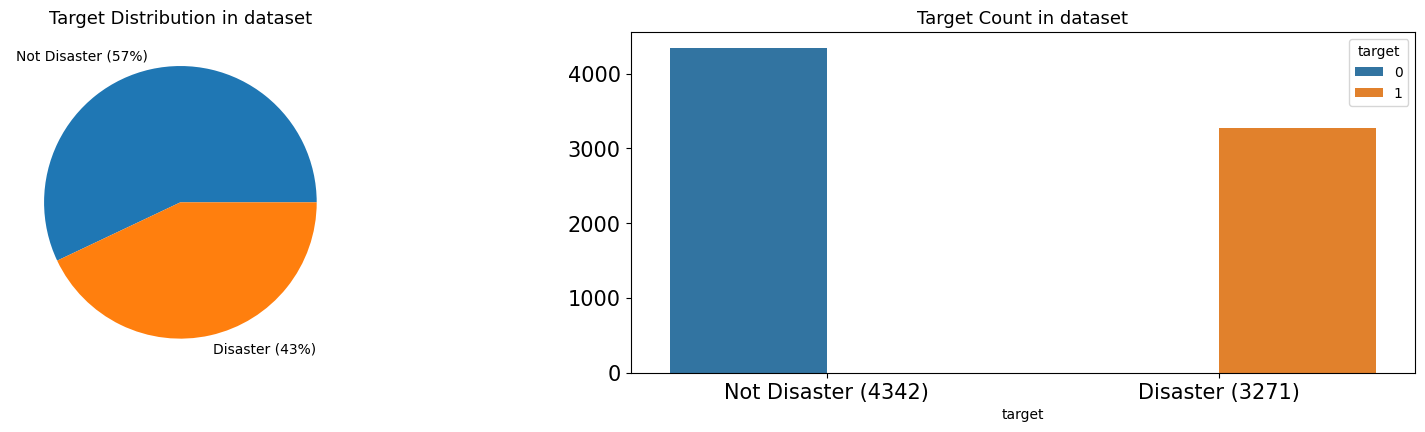

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=df['target'], hue=df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in dataset', fontsize=13)
axes[1].set_title('Target Count in dataset', fontsize=13)

plt.show()

# Cleaning of data 
- df deaster tweets - 'dt'

### clean NaN

In [41]:
# dt = my_df_text_mining(disaster_tweets.copy(), 'text')
# should not be used for TFIDF stuff since these cleaning is down there as well :)

In [42]:
# dt.tail(3)

# Analizing tweet < text >
- NLP keyword, localization 

### split


In [46]:
no_keyword_ = dt[  dt.keyword.isna()]
keyword_    = dt[ ~dt.keyword.isna()]

NameError: ignored

In [47]:
no_location_ = dt[  dt.location.isna()]
location_    = dt[ ~dt.location.isna()]

NameError: ignored

In [ ]:
no_target_ = dt[ dt.target == 0]
target_    = dt[ dt.target == 1]

### lemmatized

In [ ]:
location_

### trail to ... (petra)

# trail to ... with spacy (Jan)

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#### just for fun here :)
text = "jedi dummy texxt 4 fun; mountain, water, south sea, lake laach"
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)

for ent in spcy_txt.ents:
  if (ent.label_ =='LOC') | (ent.label_ =='GPE') : 
    print(f"{ent} {' ':{10}} {ent.label_}") 
    #print(type(ent))
    #print(type(ent.label_))

text = "jedi test Moscow, near North sea, mountain lake, auto , Zugspitze"
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)

for ent in spcy_txt.ents:
  if (ent.label_ =='LOC') | (ent.label_ =='GPE') : 
    print(f"{ent} \t {ent.label_}") 



#spacy.explain("GPE")
#spacy.explain("LOC")
### :)

In [ ]:
text = "#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count "
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)


text = "#raining #flooding #Florida, #TampaBay #Tampa 18 or 19 days. I've lost count "
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)

text = "#raining #flooding #Florida, #TampaBay, #Tampa 18 or 19 days. I've lost count "
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)


text = "#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires"
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)

text = "#RockyFire Update => California, Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires"
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)

text = "#RockyFire Update => California, Hwy. 20 closed in both directions due to Lake, County, fire - #CAfire #wildfires"
spcy_txt=nlp(text)
displacy.render(spcy_txt, style='ent', jupyter=True)

[List of available named entities](https://spacy.io/api/annotation#named-entities)

GPE Countries, cities, states

LOC	Non-GPE locations, mountain ranges, bodies of water.

In [ ]:
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, plot_confusion_matrix

from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#cv = CountVectorizer()
#bow_cv = cv.fit_transform(df["_lemmatized"])

## Helper function

In [ ]:
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)
  text = " ".join(text.split())
  text = text.lower()

  return text

def my_df_text_mining(df, col):
  lemmatizer = WordNetLemmatizer()
  my_stopwords = stopwords.words("english")
  
  df["_no_stopwords"] = df[col].apply(             lambda texxt: " ".join([word for word in clean_text(texxt).split() if word not in my_stopwords]))
  df[col]             = df["_no_stopwords"].apply( lambda texxt: " ".join([lemmatizer.lemmatize(word) for word in texxt.split()]) )

  return df.drop(["_no_stopwords"], axis=1)

################################
def my_df_spacy_locgpe(df, col):  
  df["loc_gpe"] = df[col].apply( lambda texxt: " ".join([ str(ent) for ent in nlp(texxt).ents  if ((ent.label_ =='LOC') | (ent.label_ =='GPE'))]) )
  return df

def my_df_spacy_date_time(df, col):
  df["date_time"] = df[col].apply( lambda texxt: " ".join([ str(ent) for ent in nlp(texxt).ents  if ((ent.label_ =='DATE') | (ent.label_ =='TIME'))]) )
  return df

def my_df_spacy_fac(df, col):
  df["FAC"] = df[col].apply( lambda texxt: " ".join([ str(ent) for ent in nlp(texxt).ents  if (ent.label_ =='FAC') ]) )
  return df
################################

## jedi playground

In [ ]:
test_df = disaster_tweets[0:40]
list(test_df.text)

In [ ]:
df1 = my_df_spacy_locgpe(test_df.copy(), 'text')

In [ ]:
df2 = my_df_spacy_date_time(df1.copy(), 'text')
df2

# Evaluationg Basic modeling

In [ ]:
df    = disaster_tweets.copy()

In [ ]:
#tfidf_v = TfidfVectorizer(ngram_range=(1, 2))
#tfidf_bow = tfidf_v.fit_transform(df["_lemmatized"])   # FIT and transform to learn
### ??? wo wird das denn weiterverwendet ???

In [ ]:
#tfidf_v.transform(no_df['_lemmatized'])  # only transformation!!!

## Train-Test-Split

In [ ]:
X_train, X_test,\
y_train, y_test =\
 train_test_split(df["text"],
                  df["target"],
                  test_size=0.2,
                  random_state=314159,
                  stratify=df["target"])

##pipline Tfidf, MultinomialNB

In [ ]:
#### naive bayes 
pipeMNB = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), MultinomialNB())

#display( cross_val_score(pipeMNB, X_train, y_train).mean() )

pipeMNB.fit(X_train, y_train)

plot_confusion_matrix(pipeMNB, X_test, y_test, values_format="0.3f", normalize='true', cmap="RdYlGn")
plt.title(f"best accuracy: { accuracy_score(y_test, pipeMNB.predict(X_test)):0.3f}")
plt.show()

In [ ]:
df = disaster_tweets.copy()
#### copy for trials

X_train, X_test,\
y_train, y_test =\
 train_test_split(df["text"],
                  df["target"],
                  test_size=0.2,
                  random_state=314159,
                  stratify=df["target"])


#### naive bayes 
pipeMNB = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), MultinomialNB())

#display( cross_val_score(pipeMNB, X_train, y_train).mean() )

pipeMNB.fit(X_train, y_train)

plot_confusion_matrix(pipeMNB, X_test, y_test, values_format="0.3f", normalize='true', cmap="RdYlGn")
plt.title(f"best accuracy: { accuracy_score(y_test, pipeMNB.predict(X_test)):0.3f}")
plt.show()

# Evaluation extended Modeling (weitere Spalten)

# Final Model